## Całkowanie
##### Anna Zając

**Zadanie 1**<br />
Korzytając z pakietu Polynomials zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:
$$P_0(x)=1$$
$$P_1(x)=x$$
$$P_{k+1}(x)=\frac{2k+1}{k+1}xP_k(x) - \frac{k}{k+1}P_{k-1}(x)$$
* narysuj ich wykresy w przedziale (-1,1)
* sprawdź(np. za pomocą fukcji roots z pakietu Polynomials), że ich zera sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
* podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

Zdefiniowano funkcję implementującą wielomiany Legendre'a:

In [1]:
function Legendre(n::Integer)
    function LegendreFor(x)
    if(n==0) 
        return 1
    end
    if(n==1) 
        return x   
    end
    
    P_i=1
    P_j=x
    
    for k in 2:n
        P_k=(2*(k-1) + 1)/(k)*x*P_j - (k-1)/(k)*P_i
        P_i=P_j
        P_j=P_k
    end
    
    return P_j
    end
    return LegendreFor
end

Legendre (generic function with 1 method)

Następnie narysowano wykresy sześciu pierwszych wielomianów:

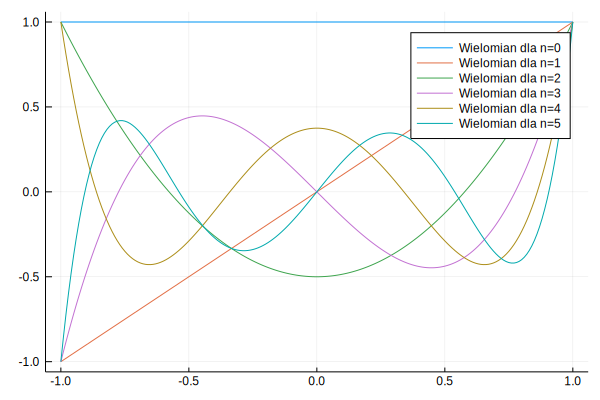

In [2]:
using Plots
xes  = (-1:0.01:1)
legendre_0 = Legendre(0)
legendre_1 = Legendre(1)
legendre_2 = Legendre(2)
legendre_3 = Legendre(3)
legendre_4 = Legendre(4)
legendre_5 = Legendre(5)
yes_0 = [legendre_0(x) for x in xes]
yes_1 = [legendre_1(x) for x in xes]
yes_2 = [legendre_2(x) for x in xes]
yes_3 = [legendre_3(x) for x in xes]
yes_4 = [legendre_4(x) for x in xes]
yes_5 = [legendre_5(x) for x in xes]
plot(xes,yes_0, label="Wielomian dla n=0")
plot!(xes,yes_1, label="Wielomian dla n=1")
plot!(xes,yes_2, label="Wielomian dla n=2")
plot!(xes,yes_3, label="Wielomian dla n=3")
plot!(xes,yes_4, label="Wielomian dla n=4")
plot!(xes,yes_5, label="Wielomian dla n=5")

Następnie za pomocą funkcji gauss() uzyskano odcięte punktów Gaussa, natomiast za pomocą funkcji find_zeros() uzyskano miejsca zerowe wielomianów Legendre'a (dla n= 2,3,4). Uzyskane zbiory punktów, w celu ich porównania, umieszczono w DataFrames:

In [3]:
using Roots
using QuadGK
using DataFrames
zeros2=find_zeros(legendre_2,-1,1)
zeros3=find_zeros(legendre_3,-1,1)
zeros4=find_zeros(legendre_4,-1,1)
(xp_2,a_2)=gauss(Float64,2)
(xp_3,a_3)=gauss(Float64,3)
(xp_4,a_4)=gauss(Float64,4)
df = DataFrame(N=2:4, Legendre=[zeros2,zeros3,zeros4], Gauss=[xp_2,xp_3,xp_4])

,N,Legendre,Gauss
,Int64,Array…,Array…
1,2,"[-0.57735, 0.57735]","[-0.57735, 0.57735]"
2,3,"[-0.774597, 0.0, 0.774597]","[-0.774597, 0.0, 0.774597]"
3,4,"[-0.861136, -0.339981, 0.339981, 0.861136]","[-0.861136, -0.339981, 0.339981, 0.861136]"


Jak można zauważyć, miejsca zerowe wielomianów i odcięte punktów Gaussa pokrywają się.
<br /> Fakt ten można uzasadnić, odwołując się do podstawowego twierdzenia kwadratur Gaussa:
<br />
<br /><em>Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w $[a,b]$ są zerami wielomianu ortogonalnego $\varphi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.</em>
<br />
<br />Funkcja gauss() zwraca punkty z przedziału (-1,1) dla funkcji ważącej tożsamościowo równej 1. Wielomian Legendre'a jest wielomianem ortogonalnym, którego również rozważamy na przedziale (-1,1) oraz dla funkcji ważącej tożsamościowo równej 1. Powyższe twierdzenie uzasadnia więc fakt pokrywania się miejsc zerowych wielomianów i odciętych punktów Gaussa dla danego n.

**Zadanie 2**<br />
Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$ policzy $\int_{-1}^{1} f dx$ metodą używającą funkcji:
<br /> gauss(k)
<br /> oraz sumy
<br /> sum(a .* f.(xp))
* przetestuj dla wielomianów coraz większych stopni
* sprawdź kiedy przestaje być dokładna,
* podaj związek z twierdzeniem o stopniu dokładności kwadratury Gaussa

In [4]:
function Gauss(k::Integer,f::Function)
    (xes,a) = gauss(Float64,k)
    return sum(a .* f.(xes))
end

Gauss (generic function with 1 method)

Następnie prztestowano działanie funkcji dla wielomianów stopni parzystych od 4 do 14, dla liczby punktów od 2 do 9:

In [5]:
function power(n::Integer)
    function powerFor(x)
        return x^n
    end
    return powerFor
end

DataFrame(Liczba_punktów=2:9,x4=[Gauss(x,power(4)) for x in 2:9],x6=[Gauss(x,power(6)) for x in 2:9], x8=[Gauss(x,power(8)) for x in 2:9], x10=[Gauss(x,power(10)) for x in 2:9],x12=[Gauss(x,power(12)) for x in 2:9],x14=[Gauss(x,power(14)) for x in 2:9])

,Liczba_punktów,x4,x6,x8,x10,x12,x14
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,2,0.222222,0.0740741,0.0246914,0.00823045,0.00274348,0.000914495
2,3,0.4,0.24,0.144,0.0864,0.05184,0.031104
3,4,0.4,0.285714,0.210612,0.156035,0.115692,0.08579
4,5,0.4,0.285714,0.222222,0.178886,0.145853,0.119466
5,6,0.4,0.285714,0.222222,0.181818,0.153108,0.130949
6,7,0.4,0.285714,0.222222,0.181818,0.153846,0.133148
7,8,0.4,0.285714,0.222222,0.181818,0.153846,0.133333
8,9,0.4,0.285714,0.222222,0.181818,0.153846,0.133333


Na podstawie wyników testu zamieszczonych w tabeli można stiwerdzić, że funkcja przestaje być dokładna, jeśli stopień wielomianu przekracza liczbę 2n-1, gdzie n jest liczbą punktów Gaussa przekazaną jako parametr funkcji.
<br /> Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa:
<br />
<br /> <em>Kwadratura ma stopień dokładności 2n−1 (dla n-punktowej kwadratury).</em>

**Zadanie 3**<br />
Skorzystaj z rozwiązania zadania 2 do napisania funkcji liczącej całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$
dokonując normalizacji do $\int_{-1}^{1} F(z) dz$ podstawiając:
$$x=\frac{b+a}{2}+ \frac{b-a}{2} z $$ oraz

$$dx =\frac{b-a}{2} dz $$

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

Całka na przedziale $[a,b]$ musi zostać zamieniona na całkę na przedziale (-1,1). Można to zrobić w następujący sposób:
$ \int _{a}^{b}f(x)\,dx={\frac {b-a}{2}}\int _{-1}^{1}f\left({\frac {b-a}{2}}z +{\frac {a+b}{2}}\right)\,dz \approx {\frac {b-a}{2}}\sum _{i=1}^{n}w_{i}f\left({\frac {b-a}{2}}z _{i}+{\frac {a+b}{2}}\right)$

In [6]:
function AnyGauss(k::Integer,f::Function,a,b)
    (xes,weights) = gauss(Float64,k)
    xes2=[(b-a)/2*x+(a+b)/2 for x in xes]
    return (b-a)/2*sum(weights .* f.(xes2))
end

AnyGauss (generic function with 1 method)

Działanie funkcji przetestowano na kilku przykładach:

$\int _{-2}^2 x^2 dx = \frac{1}{3} x^3 \Big|_{-2}^{2}= 5.(3)$

In [7]:
AnyGauss(3,power(2),-2,2)

5.333333333333334

$\int _{-5}^{10} x^4 dx = \frac{1}{5} x^5 \Big|_{-5}^{10}= 20625$

In [8]:
AnyGauss(5,power(4),-5,10)

20625.0

$\int _{-11}^2 x^3 dx = \frac{1}{4} x^4 \Big|_{-11}^{2}= -3656.25$

In [9]:
AnyGauss(6,power(3),-11,2)

-3656.25

$\int _{-8}^6 x^5 dx = \frac{1}{6} x^6 \Big|_{-8}^{6}= -35914.(6)$

In [10]:
AnyGauss(5,power(5),-8,6)

-35914.66666666667

$\int _{-3}^2 x^6 dx = \frac{1}{7} x^7 \Big|_{-3}^{2}= 330.(714285)$

In [11]:
AnyGauss(5,power(6),-3,2)

330.7142857142859

Na podstwie wykonanych testów można wnioskować, że funkcja działa prawidłowo. Należy jednak pamiętać, że im mniej punktów weźmiemy do kwadratury, tym gorsza będzie dokładność, a poniżej wartości 2n-1 (n-liczba punktów) wynik nie będzie prawidłowy.
<br /> Przeanalizowano dokładność wyniku na podstawie ostatniej testowanej funkcji:

In [12]:
AnyGauss(4,power(6),-3,2)

330.71428571428584

Widać, że wynik jest nadal dobry, jednak został błędnie zaokrąglony (na 13-stym miejscu po przecinku powinno być 9).

In [13]:
AnyGauss(3,power(6),-3,2)

302.81250000000006

Przy zejściu poniżej wartości 2n-1 (dla n=3 wynosi ona 5) wynik przestaje być prawidłowy.

**Zadanie 4**<br />
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja quadgk używająca całkowania Gauss-Kronroda:
* użyj tej funkcji do policzenia całki dla przykładowego wielomianu.
* funkcja ta ma możliwość liczenia również całek do nieskończoności.
<br />Policz całkę od minus do plus nieskonczonosci standardowego rozkładu normalnego Gaussa $ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

Funkcja quadgk jako argumenty przyjmuje funkcję oraz przedziały, dla których całkę ma obliczyć (przedziałów może być wiele).
Jako argumenty opcjonalne można przykładowo przekazać błąd względny oraz bezwzględny. Funkcja zwraca parę liczb: oszacowaną całkę oraz oszacowany maksymalny błąd bezwzględny.
<br /> Najpierw funkcja zostanie użyta do obliczenia przykładowego wielomianu:
$$\int _{-5}^4 x^5-3\cdot x^3+10\cdot x^2-9 dx = (\frac{x^6}{6} - \frac{3\cdot x^4}{4} + \frac{10\cdot x^3}{3} - 9x) \Big|_{-5}^{4}= -1095.75$$

In [14]:
f(x) = x^5-3*x^3+10*x^2-9
quadgk(f,-5,4)

(-1095.7500000000007, 2.2737367544323206e-13)

Funkcja obliczyła zadaną całkę z dużą dokładnością.
<br /> Istnieje również mozliwość obliczenia całek do nieskończoności. Tej opcji użyto do obliczenia $\int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$, czyli całkę dla standardowego rozkładu normalnego:

In [15]:
f(x) = 1/sqrt(2*pi)*ℯ^(-x^2/2)
quadgk(f,-Inf,Inf)

(1.0000000000032583, 1.4395584941504537e-8)

Wynik tej całki to 1, więc oszacowanie poczynione przez funkcję zgadzają się do 11 miejsca po przecinku. Oszacowany błąd również jest większy niż przy obliczaniu całki z wielomianu w przedziale o skończonej długości

**Zadanie 5**<br />
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie, w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
* wykładniczej
* trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [60]:
function Rectangle(k::Integer, f::Function, a,b)
    dx = (b-a)/k
    x1=a
    sum=0
    for i in 1:k
        y = x1 + dx/2
        sum+=f(y)
        x1=x1+dx
    end
    return dx*sum
end 

Rectangle (generic function with 1 method)

In [78]:
function Trapezoid(k::Integer, f::Function,a,b)
    dx = (b-a)/k
    x1=a
    x2=a+dx
    sum=0
    for i in 1:k
        sum+= (f(x1) + f(x2))*dx/2
        x1=x2
        x2=x2+dx
    end
    return sum
end

Trapezoid (generic function with 1 method)

Na całki, którymi będzie testowana dokładność oszacowania, wybrano:
$$\int _0^1 e^x \approx 1.718281828459045$$
oraz
$$\int _0^{2\pi} cosx = 0$$

In [34]:
f(x)=ℯ^x
g(x)=cos(x)
f_exact = ℯ-1
g_exact = 0
num_of_points = 1:1:100

1:1:100

W pierwszej kolejności narysowano wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie dla funkcji wykładniczej, przy wykorzystaniu metody prostokątów oraz metody trapezów:

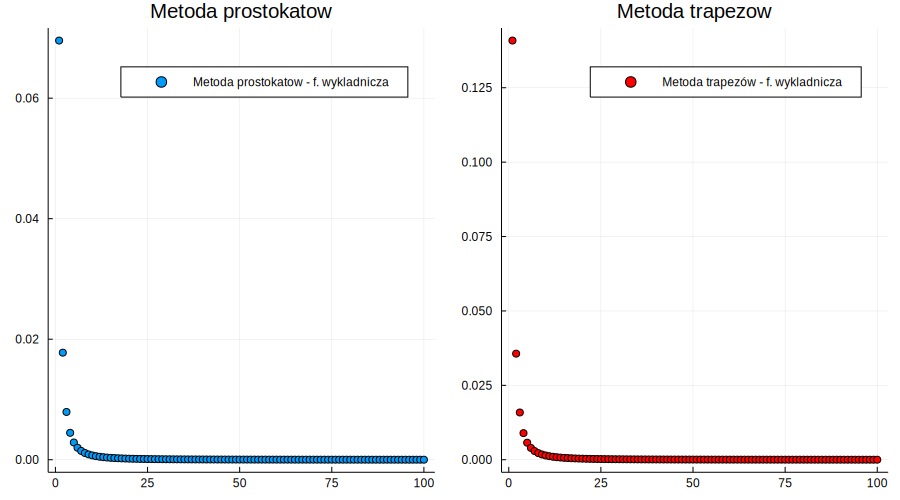

In [79]:
yes = [abs(f_exact-Rectangle(k,f,0,1)) for k in num_of_points]
plot1 = scatter(num_of_points,yes, label="Metoda prostokatow - f. wykladnicza",title="Metoda prostokatow")
yes = [abs(f_exact-Trapezoid(k,f,0,1)) for k in num_of_points]
plot2=scatter(num_of_points,yes, label="Metoda trapezów - f. wykladnicza",title="Metoda trapezow",color="red")
plot(plot1,plot2,layout=2)
plot!(size=(900,500))

Dla funkcji wykładniczej kwadratury zachowują się bardzo podobnie, nieznacznie większe błędy generuje metoda trapezów. Błędy zanikają praktycznie do zera już po zastozowaniu około 15 przedziałów.
<br />Następnie narysowano wykres funkcji błędu w stosunku do wyniku otrzymanego analitycznie dla funkcji trygonometrycznej, przy wykorzystaniu metody prostokątów oraz metody trapezów:

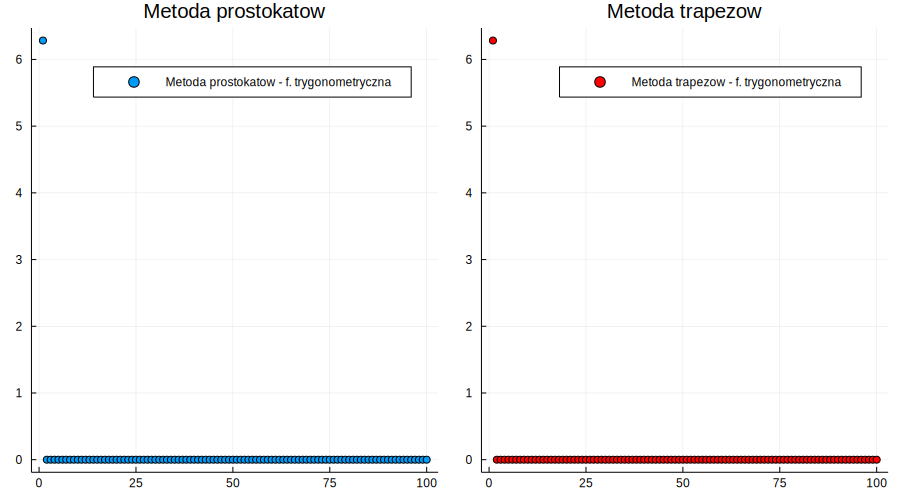

In [80]:
yes = [abs(g_exact-Rectangle(k,g,0,2*pi)) for k in num_of_points]
plot3=scatter(num_of_points,yes, label="Metoda prostokatow - f. trygonometryczna",title="Metoda prostokatow")
yes = [abs(g_exact-Trapezoid(k,g,0,2*pi)) for k in num_of_points]
plot4=scatter(num_of_points,yes, label="Metoda trapezow - f. trygonometryczna",title="Metoda trapezow",color="red")
plot(plot3,plot4,layout=2)
plot!(size=(900,500))

Metoda prostokątów i trapezów zachowują się identycznie dla metody trapezów oraz metody prostokątów: błąd pojawia się tylko przy zastosowaniu pojedynczego przedziału, ale jest bardzo duży.